
[Population data](https://redistrictingdatahub.org/dataset/south-carolina-block-pl-94171-2020-by-table/): based on the decennial census at the Census Block level on 2020 Census Redistricting Data

[2020 County data](https://redistrictingdatahub.org/dataset/south-carolina-county-pl-94171-2020/): from 2020 Census Redistricting Data (P.L. 94-171) Shapefiles

[State Senate District data](https://redistrictingdatahub.org/dataset/2021-south-carolina-state-senate-approved-plan/): 2021 State Senate Approved Plan

[2020 election data](https://redistrictingdatahub.org/dataset/vest-2020-south-carolina-precinct-and-election-results/)**:**  VEST 2020 South Carolina precinct and election results

[2018 election data](https://redistrictingdatahub.org/dataset/vest-2018-south-carolina-precinct-and-election-results/)**:**  VEST 2018 South Carolina precinct and election results

In [93]:
import pandas as pd
import geopandas as gpd
import maup
from maup import smart_repair
import time
import os

In [94]:
import warnings
warnings.filterwarnings('ignore')

In [95]:
maup.progress.enabled = True

## Import and Explore the Data

The data set below has within it the population by census block<br>
Note: it is always very important to read the README files to understand the data fields<br>
This file is useful for the data below:<br>
[https://www2.census.gov/programs-surveys/decennial/2020/technical-documentation/complete-tech-docs/summary-file/2020Census_PL94_171Redistricting_StatesTechDoc_English.pdf](https://www2.census.gov/programs-surveys/decennial/2020/technical-documentation/complete-tech-docs/summary-file/2020Census_PL94_171Redistricting_StatesTechDoc_English.pdf)

Note: importing the census data takes about 2 minutes per file.  The other files are faster. <br>
This first census file has population, Hispanic and non-Hispanic details.

In [96]:
start_time = time.time()
population_df = gpd.read_file("nm_pl2020_b/nm_pl2020_p2_b.shp")
end_time = time.time()
print("The time to import nm_pl2020_p2_b.shp is:",
      (end_time-start_time)/60, "mins")

The time to import nm_pl2020_p2_b.shp is: 1.9088140328725178 mins


This second census file has voting age population (VAP), Hispanic and non-Hispanic details.

In [97]:
start_time = time.time()
vap_df= gpd.read_file("nm_pl2020_b/nm_pl2020_p4_b.shp")
end_time = time.time()
print("The time to import nm_pl2020_p4_b.shp is:",
      (end_time-start_time)/60, "mins")

The time to import nm_pl2020_p4_b.shp is: 1.905109965801239 mins


The data set below has 2020 presidential election results by precinct

In [98]:
start_time = time.time()
vest20_df = gpd.read_file("nm_vest_20/nm_vest_20.shp")
end_time = time.time()
print("The time to import nm_vest_20.shp is:",
      (end_time-start_time)/60, "mins")

The time to import nm_vest_20.shp is: 0.05297483205795288 mins


And the set below has data of county lines

In [99]:
start_time = time.time()
county_df = gpd.read_file("nm_pl2020_cnty/nm_pl2020_cnty.shp")
end_time = time.time()
print("The time to import nm_pl2020_cnty.shp is:",
      (end_time-start_time)/60, "mins")

The time to import nm_pl2020_cnty.shp is: 0.017599153518676757 mins


The data set below is a shapefile of the state house districts

In [100]:
start_time = time.time()
sen_df = gpd.read_file("nm_sldl_adopted_2021/HD_221619.shp")
end_time = time.time()
print("The time to import state house districts is:",
      (end_time-start_time)/60, "mins")

The time to import state house districts is: 0.025797033309936525 mins


We can see that it has 46 rows, which is the number of state house seats that South Carolina has:

In [101]:
sen_df.shape

(70, 87)

Let's just take a peek at the column names:

In [102]:
print(population_df.columns)
print(vap_df.columns)
print(vest20_df.columns)
print(county_df.columns)
print(sen_df.columns)

Index(['GEOID20', 'SUMLEV', 'LOGRECNO', 'GEOID', 'COUNTY', 'P0020001',
       'P0020002', 'P0020003', 'P0020004', 'P0020005', 'P0020006', 'P0020007',
       'P0020008', 'P0020009', 'P0020010', 'P0020011', 'P0020012', 'P0020013',
       'P0020014', 'P0020015', 'P0020016', 'P0020017', 'P0020018', 'P0020019',
       'P0020020', 'P0020021', 'P0020022', 'P0020023', 'P0020024', 'P0020025',
       'P0020026', 'P0020027', 'P0020028', 'P0020029', 'P0020030', 'P0020031',
       'P0020032', 'P0020033', 'P0020034', 'P0020035', 'P0020036', 'P0020037',
       'P0020038', 'P0020039', 'P0020040', 'P0020041', 'P0020042', 'P0020043',
       'P0020044', 'P0020045', 'P0020046', 'P0020047', 'P0020048', 'P0020049',
       'P0020050', 'P0020051', 'P0020052', 'P0020053', 'P0020054', 'P0020055',
       'P0020056', 'P0020057', 'P0020058', 'P0020059', 'P0020060', 'P0020061',
       'P0020062', 'P0020063', 'P0020064', 'P0020065', 'P0020066', 'P0020067',
       'P0020068', 'P0020069', 'P0020070', 'P0020071', 'P002

The state house dataframe has just one `DISTRICT` column.  That makes things easy for us (some states have their district column named something else)

In [103]:
print(sen_df.head())

   ID        AREA DISTRICT  MEMBERS LOCKED  NAME  POPULATION  F18_POP  \
0   1  355.002441        1      1.0   None  None       28162    20833   
1   2  131.669159       10      1.0   None  None       30697    23530   
2   3   11.999463       11      1.0   None  None       30889    25549   
3   4    9.793800       12      1.0   None  None       30913    22693   
4   5    4.003754       13      1.0   None  None       31134    21616   

   H18_POP  F18_AP_IND  ...  F_REGDEM  F_REGREP  F_REGDTSOT  \
0     3960        3850  ...  0.181855  0.594009    0.224136   
1    16131        1038  ...  0.520037  0.226351    0.253611   
2    12986        2392  ...  0.596930  0.155876    0.247194   
3    18914        1028  ...  0.555525  0.179781    0.264694   
4    16717        1425  ...  0.509788  0.193243    0.296970   

                    FORMULA_FI              FORMULA_F1             FORMULA_F2  \
0  1|Dev: -6.9%|18+ NA: 14.43%  1|-6.9%|18+ NA: 14.43%  1|-6.9%|NAVAP: 14.43%   
1   10|Dev: 1.48%|18

## Columns for Census Data

Make sure you know what the columns are!  These aren't always easy to sleuth.  This document will come in handy:<br>
[Census Summary File](https://www2.census.gov/programs-surveys/decennial/2020/technical-documentation/complete-tech-docs/summary-file/2020Census_PL94_171Redistricting_StatesTechDoc_English.pdf)
<br>
We will also, of course, use the metadata given by our other data files, such as the [VEST 2020 metadata](https://redistrictingdatahub.org/dataset/vest-2020-iowa-precinct-and-election-results/)
<br>

We'll use ``` "DISTRICT" ``` as our district column name for the state house (as shown above)

In [104]:
district_col_name = "DISTRICT"

# Clean the Data

- First check with maup.doctor()
- If it needs cleaning, we'll clean and nest within counties.
- Usually census data is very clean, so we expect our population, VAP, and county data to be clean.  But we should still check
- If data is dirty, it's typically the election data, and maybe the district data.

Before we clean, we will put everything into utm crs.  (smart_repair needs this, and it's best to have everything at the same crs.)

In [105]:
population_df = population_df.to_crs(population_df.estimate_utm_crs())
vap_df = vap_df.to_crs(vap_df.estimate_utm_crs())
county_df = county_df.to_crs(county_df.estimate_utm_crs())
sen_df = sen_df.to_crs(sen_df.estimate_utm_crs())
vest20_df = vest20_df.to_crs(vest20_df.estimate_utm_crs())

In [106]:
maup.doctor(population_df)

100%|██████████| 107215/107215 [01:12<00:00, 1472.43it/s]


True

In [107]:
maup.doctor(vap_df)

100%|██████████| 107215/107215 [01:18<00:00, 1360.63it/s]


True

In [108]:
maup.doctor(county_df)

100%|██████████| 33/33 [00:00<00:00, 251.76it/s]


True

In [109]:
maup.doctor(sen_df)

100%|██████████| 70/70 [00:00<00:00, 110.42it/s]


True

In [110]:
maup.doctor(vest20_df)

100%|██████████| 1917/1917 [00:03<00:00, 542.06it/s]


There are 15 overlaps.
There are 7 holes.


False

## We need to do smart repair with our 2020 election data.

Best practice is to nest within counties and use a min rook length of something like 30 meters.

We first nest within counties

In [111]:
final_df = smart_repair(vest20_df, nest_within_regions = county_df)

100%|██████████| 33/33 [00:00<00:00, 276.18it/s]


Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.


100%|██████████| 33/33 [00:00<00:00, 51.32it/s]


Identifying overlaps...


100%|██████████| 17087/17087 [00:12<00:00, 1360.08it/s]


Resolving overlaps and filling gaps...


Gaps to fill in region 32: 100%|██████████| 6/6 [00:00<00:00, 14.65it/s]


The code below allows us to see the lengths of the borders of adjacent precincts.  Super small adjacencies should probably be turned into queen adjacencies

In [112]:
import copy
boundaries = copy.deepcopy(final_df)
boundaries["geometry"] = boundaries.geometry.boundary  # get boundaries
neighbors = gpd.sjoin(boundaries, final_df, predicate="intersects") # find boundaries that intersect
neighbors = neighbors[neighbors.index != neighbors.index_right] # remove boundaries of a region with itself

# compute shared border length using intersection
borders = list(neighbors.apply(
    lambda row: row.geometry.intersection(boundaries.loc[row.index_right, "geometry"]).length, axis=1
))

borders.sort()
print(borders[:1000])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

We note that the `min_rook_length` parameter is absolute and not relative.  We know that the utm crs is in meters, so that's why we use 30 here.  This is just a general reasonable number, and seems like a reasonable cutoff here.

In [113]:
final_df = smart_repair(final_df, min_rook_length = 30)

Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.
Identifying overlaps...


100%|██████████| 1917/1917 [00:00<00:00, 2375.62it/s]


Resolving overlaps...
Filling gaps...


Gaps to simplify: 0it [00:00, ?it/s]
Gaps to fill: 0it [00:00, ?it/s]


Converting small rook adjacencies to queen...


100%|██████████| 4/4 [00:00<00:00, 1757.51it/s]


In [114]:
maup.doctor(final_df)

100%|██████████| 1917/1917 [00:03<00:00, 552.69it/s]


True

Our data is now clean!  We'll assign blocks to precincts and aggregate population data.

## Put data in same geometry units

Here, we'll assign blocks to precints for populations <br>

In [115]:
blocks_to_precincts_assignment = maup.assign(population_df.geometry, final_df.geometry)
vap_blocks_to_precincts_assignment = maup.assign(vap_df.geometry, final_df.geometry)

100%|██████████| 1917/1917 [00:18<00:00, 102.78it/s]


In [116]:
blocks_to_precincts_assignment

0          758
1          750
2          757
3         1396
4          693
          ... 
107210     260
107211    1883
107212     243
107213     502
107214     202
Length: 107215, dtype: int64

The columns below are the ones we're interested in.

In [117]:
pop_column_names = ['P0020001', 'P0020002', 'P0020005', 'P0020006', 'P0020007',
                    'P0020008', 'P0020009', 'P0020010', 'P0020011']

In [118]:
vap_column_names = ['P0040001', 'P0040002', 'P0040005', 'P0040006', 'P0040007',
                    'P0040008', 'P0040009', 'P0040010', 'P0040011']

We'll put all of the population columns into the election dataframe

In [119]:
for name in pop_column_names:
    final_df[name] = population_df[name].groupby(blocks_to_precincts_assignment).sum()
for name in vap_column_names:
    final_df[name] = vap_df[name].groupby(vap_blocks_to_precincts_assignment).sum()

Let's check to make sure we didn't lose anyone. 

In [120]:
print(population_df['P0020001'].sum())
print(final_df['P0020001'].sum())
print(vap_df['P0040001'].sum())
print(final_df['P0040001'].sum())

2117522
2117522
1638989
1638989


The new column names below follow the conventions used [at MGGG-states](https://github.com/mggg-states) and [eveomett-states](https://github.com/eveomett-states).  Some of these columns are in the election dataframe, some in the population and vap dataframes.

We'll drop the columns that we're not interested in (including non-Democratic and non-Republican votes).

In [121]:
rename_dict = {'P0020001': 'TOTPOP', 'P0020002': 'HISP', 'P0020005': 'NH_WHITE', 'P0020006': 'NH_BLACK', 'P0020007': 'NH_AMIN',
                    'P0020008': 'NH_ASIAN', 'P0020009': 'NH_NHPI', 'P0020010': 'NH_OTHER', 'P0020011': 'NH_2MORE',
                    'P0040001': 'VAP', 'P0040002': 'HVAP', 'P0040005': 'WVAP', 'P0040006': 'BVAP', 'P0040007': 'AMINVAP',
                                        'P0040008': 'ASIANVAP', 'P0040009': 'NHPIVAP', 'P0040010': 'OTHERVAP', 'P0040011': '2MOREVAP',
                                        'G20PREDBID': 'G20PRED', 'G20PRERTRU': 'G20PRER', 'G20USSDHAR': 'G20USSD', 
                                        'G20USSRGRA': 'G20USSR'}

In [122]:
final_df.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNAME', 'VTDST', 'NAME', 'G20PREDBID',
       'G20PRERTRU', 'G20PRELJOR', 'G20PREGHAW', 'G20PRECTIT', 'G20PRESLAR',
       'G20USSDLUJ', 'G20USSRRON', 'G20USSLWAL', 'G20SSCDBAC', 'G20SSCRFUL',
       'G20SSCDTHO', 'G20SSCRMOR', 'G20SACDIVE', 'G20SACRJOH', 'G20SACDHEN',
       'G20SACRLEE', 'G20SACLCUR', 'G20SACDYOH', 'G20SACRMON', 'geometry',
       'P0020001', 'P0020002', 'P0020005', 'P0020006', 'P0020007', 'P0020008',
       'P0020009', 'P0020010', 'P0020011', 'P0040001', 'P0040002', 'P0040005',
       'P0040006', 'P0040007', 'P0040008', 'P0040009', 'P0040010', 'P0040011'],
      dtype='object')

In [123]:
final_df.rename(columns=rename_dict, inplace = True)

In [124]:
final_df.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNAME', 'VTDST', 'NAME', 'G20PRED',
       'G20PRER', 'G20PRELJOR', 'G20PREGHAW', 'G20PRECTIT', 'G20PRESLAR',
       'G20USSDLUJ', 'G20USSRRON', 'G20USSLWAL', 'G20SSCDBAC', 'G20SSCRFUL',
       'G20SSCDTHO', 'G20SSCRMOR', 'G20SACDIVE', 'G20SACRJOH', 'G20SACDHEN',
       'G20SACRLEE', 'G20SACLCUR', 'G20SACDYOH', 'G20SACRMON', 'geometry',
       'TOTPOP', 'HISP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN',
       'NH_NHPI', 'NH_OTHER', 'NH_2MORE', 'VAP', 'HVAP', 'WVAP', 'BVAP',
       'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP', '2MOREVAP'],
      dtype='object')

In [125]:
final_df.drop(columns=[
    'G20PRELJOR', 'G20PREGHAW', 'G20PRECTIT', 'G20PRESLAR',  # Presidential (non-D/R)
    'G20USSDLUJ', 'G20USSRRON', 'G20USSLWAL',               # U.S. Senate
    'G20SSCDBAC', 'G20SSCRFUL', 'G20SSCDTHO', 'G20SSCRMOR'  # State Senate
], inplace=True)
final_df.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNAME', 'VTDST', 'NAME', 'G20PRED',
       'G20PRER', 'G20SACDIVE', 'G20SACRJOH', 'G20SACDHEN', 'G20SACRLEE',
       'G20SACLCUR', 'G20SACDYOH', 'G20SACRMON', 'geometry', 'TOTPOP', 'HISP',
       'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER',
       'NH_2MORE', 'VAP', 'HVAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP',
       'NHPIVAP', 'OTHERVAP', '2MOREVAP'],
      dtype='object')

In [126]:
vap_df.rename(columns=rename_dict, inplace = True)

# Add 2018 Election Data

The vest18 dataframe has data from the 2018 elections in South Carolina

In [127]:
vest18_df = gpd.read_file("nm_vest_18/nm_vest_18.shp")

In [128]:
vest18_df.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNAME', 'VTDST', 'NAME', 'G18USSDHEI',
       'G18USSRRIC', 'G18USSLJOH', 'G18GOVDLUJ', 'G18GOVRPEA', 'G18ATGDBAL',
       'G18ATGRHEN', 'G18ATGLDUN', 'G18SOSDTOU', 'G18SOSRCLA', 'G18SOSLGRI',
       'G18TREDEIC', 'G18TRERCAS', 'G18AUDDCOL', 'G18AUDRJOH', 'G18LNDDGAR',
       'G18LNDRLYO', 'G18LNDLLUC', 'G18SSCDVIG', 'G18SSCRCLI', 'G18SACDBOG',
       'G18SACRFRE', 'G18SACDMED', 'G18SACRBOH', 'G18SACDZAM', 'G18SACRKIE',
       'G18SACDDUF', 'G18SACRGAL', 'G18SACDATT', 'geometry'],
      dtype='object')

Again, we'll rename according to convention and drop non-Democratic and non-Republican votes.

In [129]:
rename_18_dict = {
    'G18USSDHEI': 'G18USSD',
    'G18USSRRIC': 'G18USSR',

    'G18GOVDLUJ': 'G18GOVD',
    'G18GOVRPEA': 'G18GOVR',

    'G18ATGDBAL': 'G18ATGD',
    'G18ATGRHEN': 'G18ATGR',

    'G18SOSDTOU': 'G18SOSD',
    'G18SOSRCLA': 'G18SOSR',

    'G18TREDEIC': 'G18TRED',
    'G18TRERCAS': 'G18TRER',

    'G18AUDDCOL': 'G18AUDD',
    'G18AUDRJOH': 'G18AUDR',

    'G18LNDDGAR': 'G18LNDD',
    'G18LNDRLYO': 'G18LNDR',
}


In [130]:
vest18_df.rename(columns=rename_18_dict, inplace = True)

In [131]:
vest18_df.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNAME', 'VTDST', 'NAME', 'G18USSD',
       'G18USSR', 'G18USSLJOH', 'G18GOVD', 'G18GOVR', 'G18ATGD', 'G18ATGR',
       'G18ATGLDUN', 'G18SOSD', 'G18SOSR', 'G18SOSLGRI', 'G18TRED', 'G18TRER',
       'G18AUDD', 'G18AUDR', 'G18LNDD', 'G18LNDR', 'G18LNDLLUC', 'G18SSCDVIG',
       'G18SSCRCLI', 'G18SACDBOG', 'G18SACRFRE', 'G18SACDMED', 'G18SACRBOH',
       'G18SACDZAM', 'G18SACRKIE', 'G18SACDDUF', 'G18SACRGAL', 'G18SACDATT',
       'geometry'],
      dtype='object')

In [132]:
vest18_df.drop(columns=[
    'G18USSLJOH',   # U.S. Senate - Libertarian (Johnson)
    'G18ATGLDUN',   # Attorney General - Libertarian
    'G18SOSLGRI',   # Secretary of State - Libertarian
    'G18LNDLLUC'    # Land Commissioner - Libertarian
], inplace=True)
vest18_df.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNAME', 'VTDST', 'NAME', 'G18USSD',
       'G18USSR', 'G18GOVD', 'G18GOVR', 'G18ATGD', 'G18ATGR', 'G18SOSD',
       'G18SOSR', 'G18TRED', 'G18TRER', 'G18AUDD', 'G18AUDR', 'G18LNDD',
       'G18LNDR', 'G18SSCDVIG', 'G18SSCRCLI', 'G18SACDBOG', 'G18SACRFRE',
       'G18SACDMED', 'G18SACRBOH', 'G18SACDZAM', 'G18SACRKIE', 'G18SACDDUF',
       'G18SACRGAL', 'G18SACDATT', 'geometry'],
      dtype='object')

In [133]:
elec2018_cols = [
    'G18USSD', 'G18USSR',
    'G18GOVD', 'G18GOVR',
    'G18SOSD', 'G18SOSR',
    'G18TRED', 'G18TRER',
    'G18ATGD', 'G18ATGR',
    'G18AUDD', 'G18AUDR',
    'G18LNDD', 'G18LNDR'
]


## Check if this data is clean

If not, we'll use ```smart_repair```

In [134]:
vest18_df = vest18_df.to_crs(vest18_df.estimate_utm_crs())

In [135]:
maup.doctor(vest18_df)

100%|██████████| 1492/1492 [00:03<00:00, 466.62it/s] 


True

In [136]:
vest18_df = smart_repair(vest18_df)

Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.
Identifying overlaps...


100%|██████████| 1493/1493 [00:00<00:00, 2098.01it/s]


Resolving overlaps...
Filling gaps...


Gaps to simplify: 0it [00:00, ?it/s]
Gaps to fill: 0it [00:00, ?it/s]


In [137]:
maup.doctor(vest18_df)

100%|██████████| 1492/1492 [00:03<00:00, 480.08it/s] 


True

Now that is's clean, we can add it to our final dataframe.

Remember that the 2020 and 2018 election years have different precincts, so we need to disaggregate this data to the block level as previously discussed, and re-aggregate to the 2020 precincts.

In [138]:
blocks_to_2018precincts_assignment = maup.assign(population_df.geometry, vest18_df.geometry)

100%|██████████| 1492/1492 [00:10<00:00, 140.44it/s]


In [139]:
weights2018 = vap_df["VAP"]/blocks_to_2018precincts_assignment.map(vap_df["VAP"].groupby(blocks_to_2018precincts_assignment).sum())
weights2018 = weights2018.fillna(0)

In [140]:
prorated2018 = maup.prorate(blocks_to_2018precincts_assignment, vest18_df[elec2018_cols], weights2018)
population_df[elec2018_cols] = prorated2018

In [141]:
final_df[elec2018_cols] = population_df[elec2018_cols].groupby(blocks_to_precincts_assignment).sum()

In [142]:
print(final_df[elec2018_cols].sum())
print(vest18_df[elec2018_cols].sum())

G18USSD    376998.0
G18USSR    212813.0
G18GOVD    398368.0
G18GOVR    298091.0
G18SOSD    399134.0
G18SOSR    257306.0
G18TRED    394780.0
G18TRER    286822.0
G18ATGD    427583.0
G18ATGR    231296.0
G18AUDD    395714.0
G18AUDR    291714.0
G18LNDD    352335.0
G18LNDR    297379.0
dtype: float64
G18USSD    376998
G18USSR    212813
G18GOVD    398368
G18GOVR    298091
G18SOSD    399134
G18SOSR    257306
G18TRED    394780
G18TRER    286822
G18ATGD    427583
G18ATGR    231296
G18AUDD    395714
G18AUDR    291714
G18LNDD    352335
G18LNDR    297379
dtype: int64


In [143]:
final_df.head()

,STATEFP,COUNTYFP,COUNTYNAME,VTDST,NAME,G20PRED,G20PRER,G20SACDIVE,G20SACRJOH,G20SACDHEN,...,G18SOSD,G18SOSR,G18TRED,G18TRER,G18ATGD,G18ATGR,G18AUDD,G18AUDR,G18LNDD,G18LNDR
0,35,001,Bernalillo,1,PRECINCT 001,556,439,509,466,467,...,400.000000,274.000000,393.000000,306.000000,443.000000,242.000000,398.000000,310.000000,351.000000,313.000000
1,35,001,Bernalillo,2,PRECINCT 002,406,290,373,319,345,...,295.000000,227.000000,291.000000,243.000000,328.000000,192.000000,301.000000,238.000000,250.000000,260.000000
2,35,001,Bernalillo,3,PRECINCT 003,180,179,156,190,146,...,113.434355,72.734529,111.858878,78.511278,121.836900,60.655870,117.898207,75.360324,97.679584,85.863505
3,35,001,Bernalillo,35,PRECINCT 035,256,113,237,122,227,...,202.000000,76.000000,194.000000,94.000000,228.000000,58.000000,206.000000,89.000000,173.000000,100.000000
4,35,001,Bernalillo,59,PRECINCT 059,329,167,293,181,283,...,268.978882,78.601040,254.687784,110.245614,276.124431,79.111436,272.551657,95.954516,238.865497,100.548083


# Add House District Data

Get districts assignment and put it into dataframe

In [144]:
precincts_to_districts_assignment = maup.assign(final_df.geometry, sen_df.geometry)
final_df["SACD"] = precincts_to_districts_assignment

100%|██████████| 70/70 [00:02<00:00, 25.57it/s] 


This gives us an assignment of the precincts to the proper district, but using the index column.
We'd like to use the real "district name" (which here is still an integer), so we do that below.

In [145]:
precincts_to_districts_assignment

0       64
1        8
2        8
3       18
4        4
        ..
1912    60
1913    60
1914    62
1915    68
1916    68
Length: 1917, dtype: int64

In [153]:
print(set(final_df["SACD"])) #here

{'26', '28', '10', '69', '64', '58', '40', '1', '45', '27', '14', '23', '13', '24', '53', '67', '55', '29', '44', '34', '2', '21', '38', '17', '31', '56', '18', '57', '47', '54', '8', '11', '33', '22', '66', '39', '49', '3', '48', '37', '61', '35', '62', '70', '43', '63', '12', '19', '9', '41', '16', '65', '7', '52', '42', '60', '15', '25', '46', '32', '30', '50', '6', '51', '4', '5', '68', '20', '59', '36'}


In [147]:
sen_df

,ID,AREA,DISTRICT,MEMBERS,LOCKED,NAME,POPULATION,F18_POP,H18_POP,F18_AP_IND,...,F_REGDEM,F_REGREP,F_REGDTSOT,FORMULA_FI,FORMULA_F1,FORMULA_F2,FORMULA_F3,FORMULA_F4,DISTRICT_L,geometry
0,1,355.002441,1,1.0,None,None,28162,20833,3960,3850,...,0.181855,0.594009,0.224136,1|Dev: -6.9%|18+ NA: 14.43%,1|-6.9%|18+ NA: 14.43%,1|-6.9%|NAVAP: 14.43%,1|-6.9%|NAVAP: 14.43%,1|-6.9%|NAVAP: 14.43%,1|-6.9%,"POLYGON ((212249.925 4072505.182, 212230.119 4..."
1,2,131.669159,10,1.0,None,None,30697,23530,16131,1038,...,0.520037,0.226351,0.253611,10|Dev: 1.48%|18+ NA: 1.6%,10|1.48%|18+ NA: 1.6%,10|1.48%|NAVAP: 1.6%,10|1.48%|NAVAP: 1.6%,10|1.48%|NAVAP: 1.6%,10|1.48%,"POLYGON ((350518.818 3882012.421, 350549.844 3..."
2,3,11.999463,11,1.0,None,None,30889,25549,12986,2392,...,0.596930,0.155876,0.247194,11|Dev: 2.11%|18+ NA: 5.36%,11|2.11%|18+ NA: 5.36%,11|2.11%|NAVAP: 5.36%,11|2.11%|NAVAP: 5.36%,11|2.11%|NAVAP: 5.36%,11|2.11%,"POLYGON ((346749.630 3884213.219, 346745.601 3..."
3,4,9.793800,12,1.0,None,None,30913,22693,18914,1028,...,0.555525,0.179781,0.264694,12|Dev: 2.19%|18+ NA: 1.65%,12|2.19%|18+ NA: 1.65%,12|2.19%|NAVAP: 1.65%,12|2.19%|NAVAP: 1.65%,12|2.19%|NAVAP: 1.65%,12|2.19%,"POLYGON ((342949.770 3880290.108, 342954.908 3..."
4,5,4.003754,13,1.0,None,None,31134,21616,16717,1425,...,0.509788,0.193243,0.296970,13|Dev: 2.92%|18+ NA: 3.46%,13|2.92%|18+ NA: 3.46%,13|2.92%|NAVAP: 3.46%,13|2.92%|NAVAP: 3.46%,13|2.92%|NAVAP: 3.46%,13|2.92%,"POLYGON ((341551.317 3882608.224, 341553.243 3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,66,5375.018550,69,1.0,None,None,28206,21113,4083,14490,...,0.589399,0.173769,0.236832,69|Dev: -6.76%|18+ NA: 65.57%,69|-6.76%|18+ NA: 65.57%,69|-6.76%|NAVAP: 65.57%,69|-6.76%|NAVAP: 65.57%,69|-6.76%|NAVAP: 65.57%,69|-6.76%,"POLYGON ((198207.553 4010124.159, 198212.952 4..."
66,67,100.242096,7,1.0,None,None,29884,22194,14385,1078,...,0.429251,0.312931,0.257819,7|Dev: -1.21%|18+ NA: 1.57%,7|-1.21%|18+ NA: 1.57%,7|-1.21%|NAVAP: 1.57%,7|-1.21%|NAVAP: 1.57%,7|-1.21%|NAVAP: 1.57%,7|-1.21%,"POLYGON ((365684.229 3841460.334, 365661.270 3..."
67,68,5116.099600,70,1.0,None,None,29378,23487,16054,959,...,0.630389,0.194858,0.174753,70|Dev: -2.88%|18+ NA: 1.18%,70|-2.88%|18+ NA: 1.18%,70|-2.88%|NAVAP: 1.18%,70|-2.88%|NAVAP: 1.18%,70|-2.88%|NAVAP: 1.18%,70|-2.88%,"POLYGON ((471206.587 3800698.853, 471206.620 3..."
68,69,52.950558,8,1.0,None,None,31124,24155,12750,1485,...,0.378513,0.405397,0.216089,8|Dev: 2.89%|18+ NA: 2.86%,8|2.89%|18+ NA: 2.86%,8|2.89%|NAVAP: 2.86%,8|2.89%|NAVAP: 2.86%,8|2.89%|NAVAP: 2.86%,8|2.89%,"POLYGON ((347494.066 3853846.460, 347379.541 3..."


We'd like to use the real district names, and the following code properly assigns those:

In [148]:
for precinct_index in range(len(final_df)):
    print(sen_df.at[45, district_col_name])
    print(final_df.at[precinct_index, "SACD"])
    final_df.at[precinct_index, "SACD"] = sen_df.at[int(final_df.at[precinct_index, "SACD"]), district_col_name]
print(set(sen_df[district_col_name]))
print(set(final_df["SACD"]))

50
64
50
8
50
8
50
18
50
4
50
4
50
5
50
2
50
6
50
6
50
15
50
64
50
6
50
7
50
21
50
6
50
6
50
4
50
15
50
15
50
8
50
6
50
7
50
64
50
18
50
6
50
6
50
6
50
6
50
21
50
3
50
6
50
6
50
64
50
21
50
7
50
21
50
7
50
21
50
7
50
5
50
5
50
7
50
7
50
7
50
1
50
65
50
5
50
5
50
7
50
7
50
2
50
18
50
18
50
5
50
2
50
7
50
18
50
1
50
7
50
4
50
7
50
7
50
65
50
18
50
5
50
5
50
3
50
18
50
18
50
3
50
64
50
3
50
3
50
5
50
5
50
5
50
5
50
3
50
4
50
5
50
21
50
5
50
4
50
4
50
21
50
8
50
5
50
5
50
9
50
9
50
5
50
1
50
3
50
3
50
1
50
3
50
8
50
21
50
8
50
21
50
3
50
1
50
1
50
3
50
3
50
1
50
1
50
8
50
1
50
3
50
64
50
21
50
21
50
8
50
8
50
64
50
18
50
1
50
8
50
1
50
1
50
9
50
1
50
1
50
1
50
8
50
4
50
1
50
6
50
64
50
18
50
8
50
3
50
64
50
6
50
64
50
64
50
4
50
5
50
5
50
18
50
4
50
3
50
4
50
3
50
4
50
2
50
2
50
2
50
2
50
7
50
64
50
8
50
6
50
2
50
6
50
2
50
2
50
2
50
6
50
6
50
2
50
2
50
5
50
8
50
64
50
2
50
2
50
2
50
2
50
2
50
2
50
2
50
2
50
18
50
7
50
64
50
18
50
21
50
21
50
64
50
2
50
7
50
7
50
8
50
8
50
7
50
8
50
5
50
6

In [149]:
final_df.columns

Index(['STATEFP', 'COUNTYFP', 'COUNTYNAME', 'VTDST', 'NAME', 'G20PRED',
       'G20PRER', 'G20SACDIVE', 'G20SACRJOH', 'G20SACDHEN', 'G20SACRLEE',
       'G20SACLCUR', 'G20SACDYOH', 'G20SACRMON', 'geometry', 'TOTPOP', 'HISP',
       'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN', 'NH_NHPI', 'NH_OTHER',
       'NH_2MORE', 'VAP', 'HVAP', 'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP',
       'NHPIVAP', 'OTHERVAP', '2MOREVAP', 'G18USSD', 'G18USSR', 'G18GOVD',
       'G18GOVR', 'G18SOSD', 'G18SOSR', 'G18TRED', 'G18TRER', 'G18ATGD',
       'G18ATGR', 'G18AUDD', 'G18AUDR', 'G18LNDD', 'G18LNDR', 'SACD'],
      dtype='object')

We will rename columns by convention.  For example, see: <br>
[https://github.com/mggg-states/PA-shapefiles](https://github.com/mggg-states/PA-shapefiles)

The other candidates are from other parties.  We'll drop them . . . 

To see an image of the geodataframe

1917


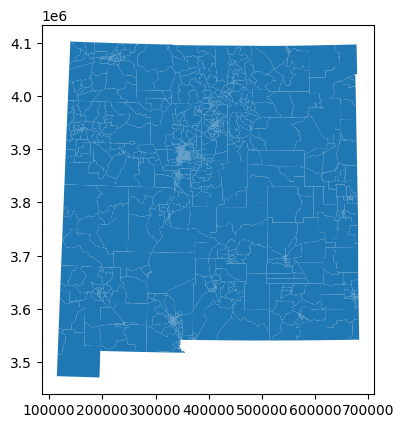

In [150]:
final_df.plot()
print(len(final_df)) 


Do some checks to make sure that the population values are nearly the same in each district

In [151]:
pop_vals = [final_df.loc[final_df["SACD"] == str(n), "TOTPOP"].sum() for n in range(1, 71)]
print(pop_vals)
len(pop_vals)


[28162, 27490, 27274, 28276, 28343, 29323, 29884, 29879, 27127, 30142, 30425, 30913, 31010, 30354, 33035, 30663, 30908, 31881, 30681, 30886, 30276, 30820, 30924, 30742, 28334, 29763, 30863, 31014, 30862, 30506, 30286, 31140, 30955, 30343, 30440, 30547, 29783, 30926, 28963, 30620, 29058, 30709, 30045, 30538, 29907, 30811, 29895, 29708, 29546, 30228, 31039, 30162, 31043, 26882, 32001, 31127, 30541, 29755, 30592, 30785, 30783, 31011, 29773, 32100, 30145, 33058, 31005, 32376, 28425, 29711]


70

If you want to save (likely you will since importing the shapefiles takes so long):

In [152]:
directory = "./NM"
if not os.path.exists(directory):
    os.makedirs(directory)
final_df.to_file("./NM/NM.shp")
